In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [3]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

ModuleNotFoundError: No module named 'tensorflow'

In [3]:
data = pd.read_csv("./covid19_sera_merged.csv")

In [4]:
print("Shape of the dataset:")
print(data.shape)
#print("The head (columns) of the dataset are:")
#print(data.head())

Shape of the dataset:
(83, 203872)


In [5]:
data.isna().sum().sum()

73366

In [21]:
y=data['label'].to_numpy()
X = data.iloc[:,102411:203872].to_numpy()

In [22]:
X=np.nan_to_num(X)

In [23]:
indices = []
for i in range(len(X[0])):
    if sum(X[:,i]==0)>=0.4*83:
        indices.append(i)

In [24]:
X= np.delete(X,indices,1)

In [25]:
X.shape

(83, 29275)

In [26]:
pca = PCA(n_components=0.999)
principalComponents = pca.fit_transform(X)


In [27]:
X_embedded = TSNE(n_components=2, init='random').fit_transform(principalComponents,y)

In [28]:
import seaborn as sns

#### TSNE from PCA50

In [29]:
principalComponents.shape

(83, 72)

<AxesSubplot:xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

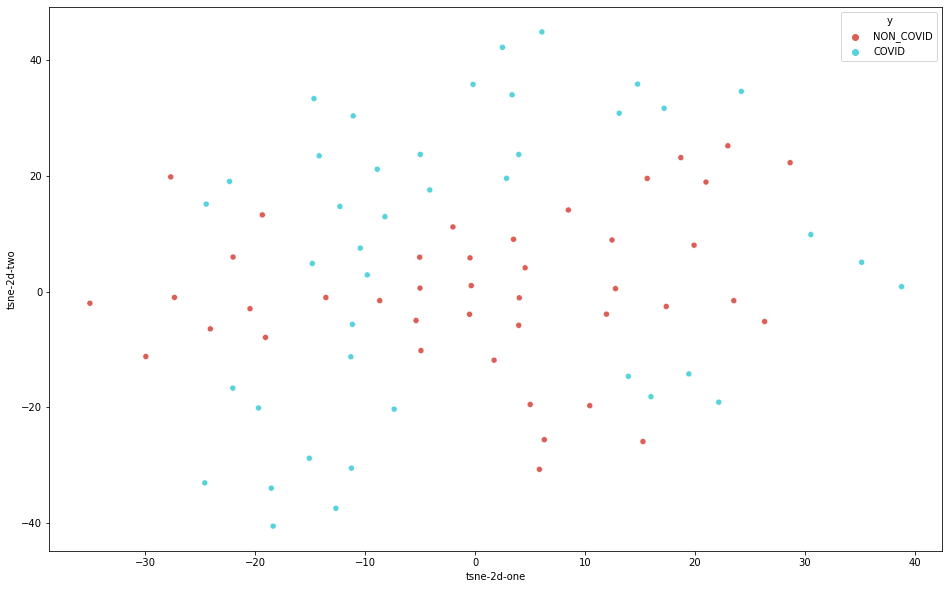

In [30]:
df_subset = pd.DataFrame()
df_subset['tsne-2d-one'] = X_embedded[:,0]
df_subset['tsne-2d-two'] = X_embedded[:,1]
df_subset['y'] = ["COVID" if i=="Non-severe-COVID-19" or i=="Severe-COVID-19" else "NON_COVID" for i in y]
#df_subset['y'] = y
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 2),
    data=df_subset,
    legend="full",
    alpha=1.0
)

#### PCA 2 from PCA50

In [ ]:
pca2 = PCA(n_components=2)
principalComponents = pca2.fit_transform(principalComponents)
df_subset = pd.DataFrame()
df_subset['pca-2d-one'] = principalComponents[:,0]
df_subset['pca-2d-two'] = principalComponents[:,1]
#df_subset['y'] = ["COVID" if i=="Non-severe-COVID-19" or i=="Severe-COVID-19" else "NON_COVID" for i in y]
df_subset['y'] = y
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-2d-one", y="pca-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 4),
    data=df_subset,
    legend="full",
    alpha=1.0
)

#### Raw X NN

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024,activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(4),
])

In [ ]:
for i in range(len(y)):
    if y[i] == 'Severe-COVID-19':
        y[i]=0
    elif y[i] == 'Non-severe-COVID-19':
        y[i]=1
    elif y[i] == 'Symptomatic-non-COVID-19':
        y[i]=2
    else:
        y[i]=3

In [ ]:
y = np.array([int(i) for i in y])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.2)

In [ ]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer="adam", loss=loss_fn, metrics=['accuracy'])

In [ ]:
y_train

In [ ]:
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs = 500, verbose=0)

In [ ]:
model.evaluate(X_test, y_test, verbose=2)

#### PCA50 NN

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024,activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(4),
])


In [ ]:
X = principalComponents
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.2)

In [ ]:
model.compile(optimizer="adam", loss=loss_fn, metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs = 2000, verbose=0)

In [ ]:
model.evaluate(X_test, y_test, verbose=2)

#### PCA 83 NN

In [ ]:
X = data.iloc[:,102411:203871].to_numpy()
X=np.nan_to_num(X)
pca = PCA(n_components=83)
principalComponents = pca.fit_transform(X)
X = principalComponents
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.2)

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024,activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(4),
])
model.compile(optimizer="adam", loss=loss_fn, metrics=['accuracy'])


In [ ]:
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs = 2000, verbose=0)

In [ ]:
model.evaluate(X_test, y_test, verbose=2)

In [ ]:
model.predict(X_test)

In [ ]:
print(y_test)

### t-test

In [31]:
from scipy import stats

In [37]:
ind = []
Y = ["COVID" if i=="Non-severe-COVID-19" or i=="Severe-COVID-19" else "NON_COVID" for i in data['label']]
for i in range (102411,203872):
    tmp = data.iloc[:,i].to_numpy()
    tmp = np.nan_to_num(tmp)

    if sum(tmp==0)<=0.4*83:
        covid = []
        non_covid = []
        for j in range(len(Y)):
            if Y[j] == "COVID":
                covid.append(tmp[j])
            else:
                non_covid.append(tmp[j])
        _, p = stats.ttest_ind(covid,non_covid)
        if p <0.05:
            ind.append(i)

In [38]:
len(ind)

1038

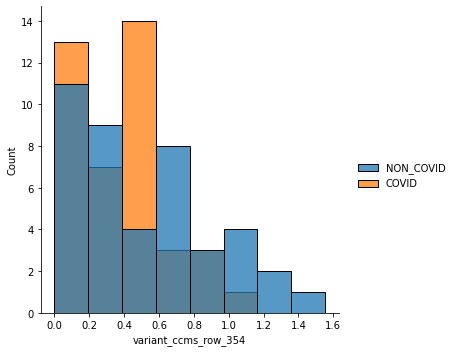

In [45]:
sns.displot(data,x=data.columns[ind[3]],hue=["COVID" if i=="Non-severe-COVID-19" or i=="Severe-COVID-19" else "NON_COVID" for i in data['label']])
plt.show()

In [41]:
ind_update = [ i-102410 for i in ind]

In [42]:
ind_update

[30,
 99,
 281,
 354,
 440,
 475,
 536,
 693,
 823,
 894,
 970,
 977,
 982,
 1059,
 1070,
 1071,
 1081,
 1103,
 1122,
 1136,
 1153,
 1157,
 1160,
 1167,
 1171,
 1190,
 1195,
 1242,
 1270,
 1292,
 1314,
 1597,
 1971,
 2265,
 2302,
 2326,
 2342,
 2383,
 2473,
 2647,
 2664,
 2971,
 3012,
 3036,
 3178,
 3191,
 3824,
 4026,
 4067,
 4498,
 4581,
 4740,
 4756,
 4763,
 4827,
 4897,
 4901,
 5018,
 5031,
 5035,
 5061,
 5188,
 5339,
 5404,
 5436,
 5468,
 5520,
 5528,
 5561,
 6709,
 6719,
 6724,
 6742,
 7205,
 7311,
 7360,
 7480,
 7497,
 7503,
 7521,
 7537,
 7538,
 7547,
 8010,
 8793,
 8796,
 8798,
 8804,
 8849,
 9353,
 9358,
 9453,
 9456,
 9472,
 9575,
 9622,
 9631,
 9703,
 9704,
 9729,
 9780,
 9847,
 9923,
 9946,
 9968,
 10010,
 10031,
 10044,
 10062,
 10066,
 10091,
 10114,
 10115,
 10131,
 10133,
 10139,
 10152,
 10201,
 10208,
 10241,
 10258,
 10260,
 10276,
 10295,
 10297,
 10833,
 10975,
 11206,
 11261,
 12387,
 12570,
 13300,
 13328,
 13724,
 13884,
 13896,
 13897,
 13914,
 13921,
 13933,
